In [1]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras import metrics
import seaborn as sns


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
splits=[]
for i in range(10):
    split = train_test_split(x, y, test_size=0.33, random_state=i)
    splits.append(split)

In [3]:
models_list=[]
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'sigmoid'),
        layers.Dense(150, activation='sigmoid'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(100, activation = 'sigmoid'),
        layers.Dense(100, activation='sigmoid'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(100, activation = 'sigmoid'),
        layers.Dense(150, activation='sigmoid'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'sigmoid'),
        layers.Dense(100, activation='sigmoid'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);

model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(100, activation = 'tanh'),
        layers.Dense(150, activation='tanh'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'tanh'),
        layers.Dense(100, activation='tanh'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'tanh'),
        layers.Dense(100, activation='tanh'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model);
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'tanh'),
        layers.Dense(100, activation='tanh'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model)

model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'tanh'),
        layers.Dense(150, activation='tanh'),
        layers.Dense(150, activation='tanh'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model)
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model)
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'sigmoid'),
        layers.Dense(150, activation='sigmoid'),
        layers.Dense(150, activation='sigmoid'),
        layers.Dense(10, activation = 'softmax')
    ]
)
models_list.append(model)

In [4]:
# model.compile(optimizer='adam',metrics=['accuracy'], loss='sparse_categorical_crossentropy')
# model.summary()
for model in models_list:
    model.compile(optimizer='adam',metrics=['accuracy'], loss='sparse_categorical_crossentropy')


In [5]:
# y_train_onehot = tf.one_hot(y_train, 10)
accuracy_list = []
confusion_matrix_list=[]
num_epochs=10;
for model in models_list:
    accuracy_model=[]
    for split in splits:
        x_train, x_test, y_train, y_test = split
        m = model.fit(x_train, y_train, epochs=num_epochs, verbose=True, validation_data=(x_test, y_test))
        # print(m.history['val_accuracy'])
        accuracy_model.append(m.history['val_accuracy'][num_epochs-1])
        y_pred_onehot = model.predict(x_test)
        y_pred = tf.argmax(y_pred_onehot, axis = 1)
        cm = tf.math.confusion_matrix(y_test, y_pred)
    confusion_matrix_list.append(cm)
    accuracy_list.append(sum(accuracy_model)/len(accuracy_model))
    # sns.heatmap(cm,
    #             annot=True,
    #             fmt='g')
    # plt.ylabel('Prediction',fontsize=13)
    # plt.xlabel('Actual',fontsize=13)
    # plt.title('Confusion Matrix',fontsize=17)
    # plt.show()

Epoch 1/10
1466/1466 [==============================] - 4s 2ms/step - loss: 0.5349 - accuracy: 0.8586 - val_loss: 0.3656 - val_accuracy: 0.8914
Epoch 2/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8939 - val_loss: 0.3323 - val_accuracy: 0.8991
Epoch 3/10
1466/1466 [==============================] - 4s 2ms/step - loss: 0.3265 - accuracy: 0.9012 - val_loss: 0.3376 - val_accuracy: 0.8968
Epoch 4/10
1466/1466 [==============================] - 3s 2ms/step - loss: 0.3021 - accuracy: 0.9064 - val_loss: 0.2967 - val_accuracy: 0.9082
Epoch 5/10
1466/1466 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.9095 - val_loss: 0.2876 - val_accuracy: 0.9095
Epoch 6/10
1466/1466 [==============================] - 4s 3ms/step - loss: 0.2710 - accuracy: 0.9143 - val_loss: 0.2862 - val_accuracy: 0.9105
Epoch 7/10
1466/1466 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9196 - val_loss: 0.2617 - val_accuracy:

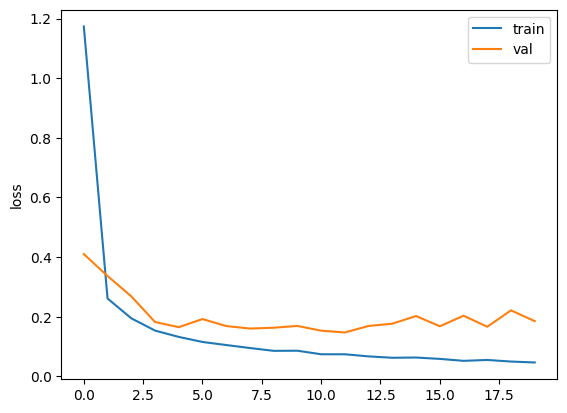

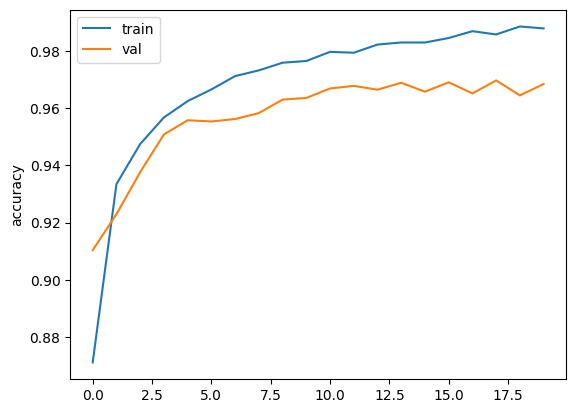

In [13]:
model = Sequential(
    [
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(150, activation = 'relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(10, activation = 'softmax')
    ]
)
model.compile(optimizer='adam',metrics=['accuracy'], loss='sparse_categorical_crossentropy')
m = model.fit(x_train, y_train, epochs=20, verbose=False, validation_data=(x_test, y_test))
plt.plot(m.history['loss'], label='train')
plt.plot(m.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(m.history['accuracy'], label='train')
plt.plot(m.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [6]:
for accuracy in accuracy_list:
    print(accuracy)

0.957688319683075
0.9521038889884949
0.955246752500534
0.9568051993846893
0.9748052000999451
0.97846320271492
0.9799350738525391
0.9796450197696686
0.94056276679039
0.9415541172027588
0.9448441624641418
0.9456277012825012
0.9410779237747192
0.9825324714183807
0.9591861486434936


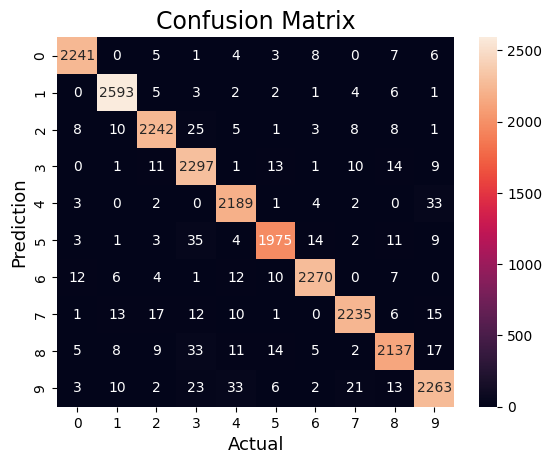

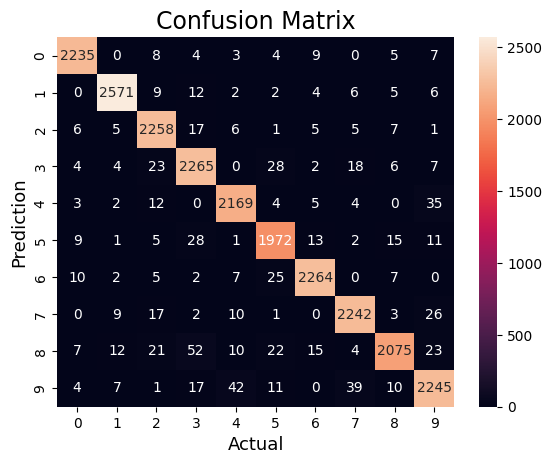

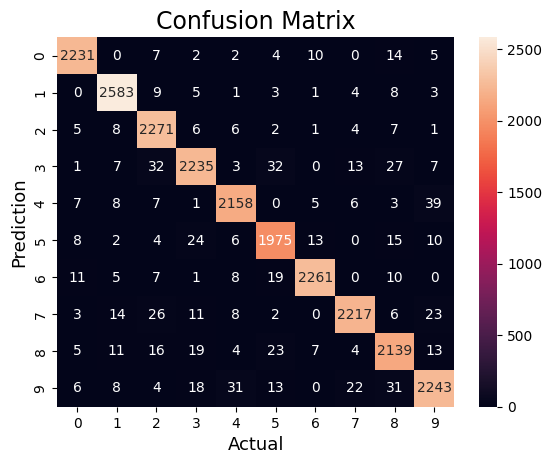

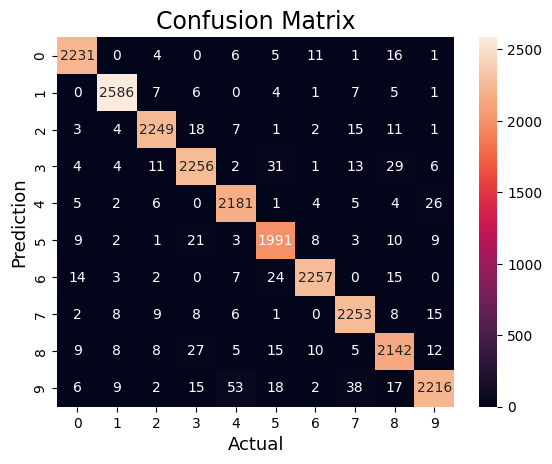

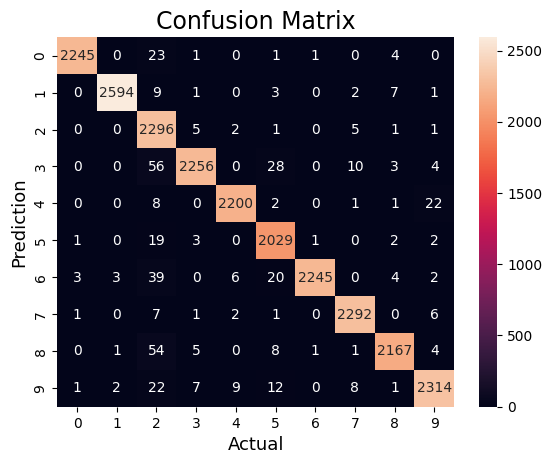

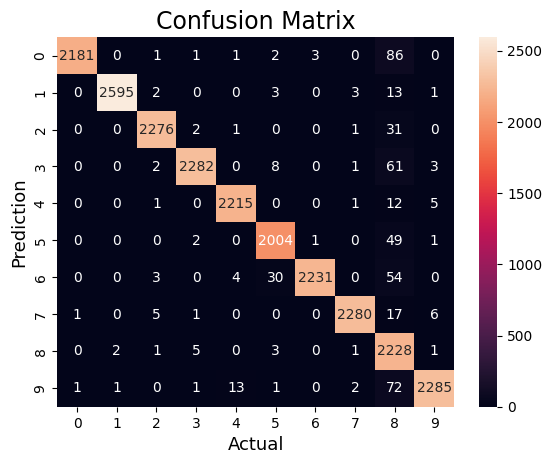

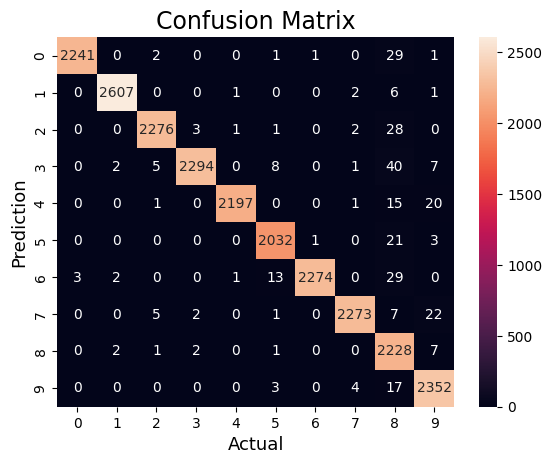

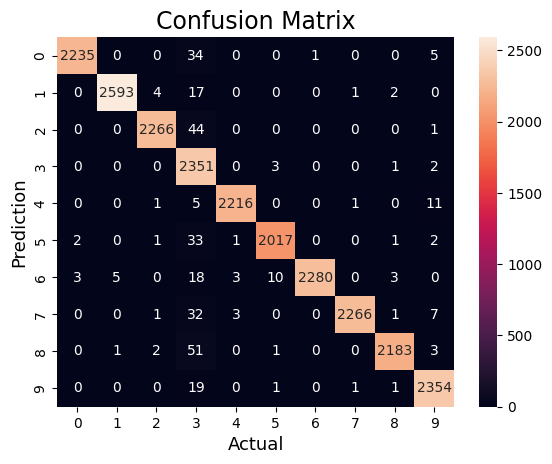

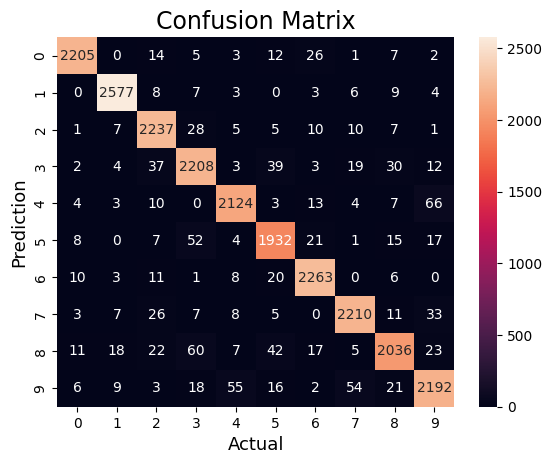

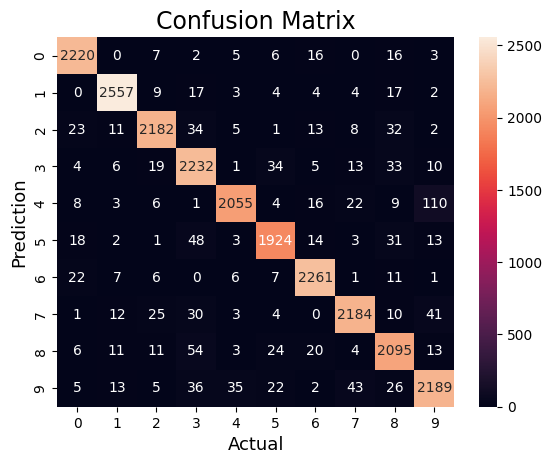

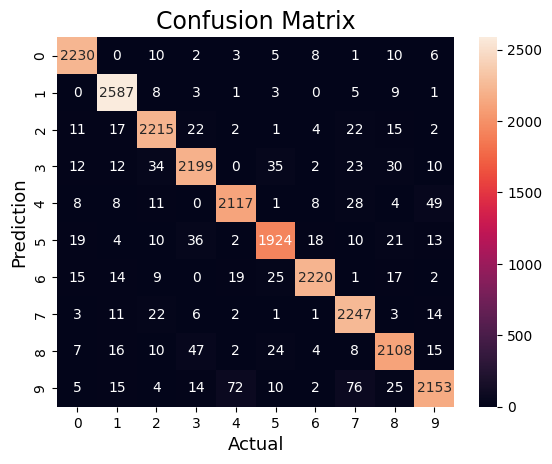

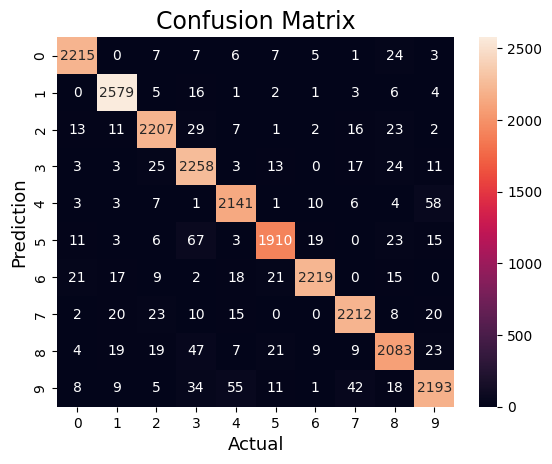

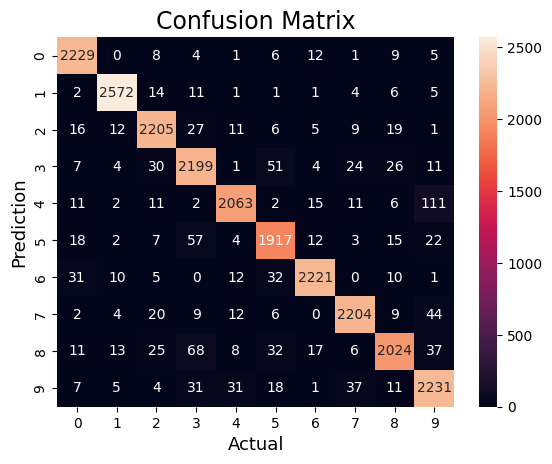

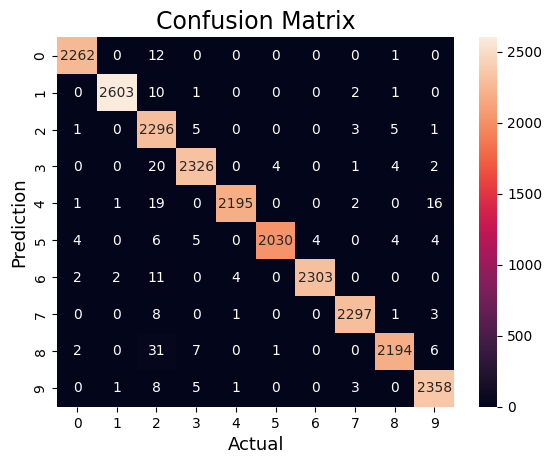

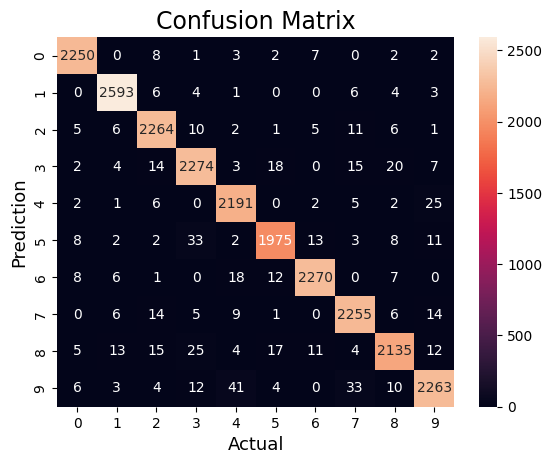

In [7]:
for cm in confusion_matrix_list:
    sns.heatmap(cm,
                annot=True,
                fmt='g')
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()